# 3 Домашнее задание от Karpov Courses 

In [5]:
import pandas as pd
import numpy as np

In [6]:
names = "Masha Volkova, Peter Voronov, Peter Parker, Anatoly Karpov"

# шаг 1 — разбиваем строку по запятым
names_list = names.split(",")

# шаг 2 — убираем пробелы вокруг имён
names_list = [name.strip() for name in names_list]

print(names_list)


['Masha Volkova', 'Peter Voronov', 'Peter Parker', 'Anatoly Karpov']


#### В переменной df содержатся данные такого вида. 

Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.


In [7]:
# Создаю пример кода для проверки

df = pd.DataFrame({ "client_id" : np.random.randint(1, 10000, 30),
                   "sex" : np.random.choice([0, 1], 30),
                   "wealth" : np.random.choice(["low", "medium", "high"], 30),
                   "age" : np.random.randint(20,70,30)})

# Ранжирую
medium_35 = df[(df["wealth"] == "medium") & (df["age"] > 35)]
print(medium_35.head())


    client_id  sex  wealth  age
3        1739    1  medium   41
4        4593    1  medium   69
5        9964    0  medium   48
14       7766    1  medium   63
20       1364    0  medium   46


#### Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант.
Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [8]:
df = df.rename(columns={
    'Клиент id': 'client_id',
    'Пол': 'sex',
    'Благосостояние': 'wealth',
    'Возраст': 'age'
})
print(df.head())

   client_id  sex  wealth  age
0       9853    0    high   39
1       9187    0     low   69
2       6056    0     low   46
3       1739    1  medium   41
4       4593    1  medium   69


#### Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)

In [9]:
df["older_than_30"] = df["age"] > 30
print(df.head())

   client_id  sex  wealth  age  older_than_30
0       9853    0    high   39           True
1       9187    0     low   69           True
2       6056    0     low   46           True
3       1739    1  medium   41           True
4       4593    1  medium   69           True


#### А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [10]:
unique_num = df.nunique()
print(unique_num)

client_id        30
sex               2
wealth            3
age              24
older_than_30     2
dtype: int64


#### У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:

Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

Предыдущий датафрейм загружен в переменную df, новый – в data 

In [11]:
data = pd.DataFrame({
    'client_id': [5392, 9581, 7250, 8619, 6573],
    'amount': [42331, 88420, 1714, 80572, 57549],
    'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]
})

full_data = df.merge(data, on='client_id', how='inner')

print(full_data.head())

Empty DataFrame
Columns: [client_id, sex, wealth, age, older_than_30, amount, date]
Index: []


## 💀 Сложное задание! 💀

P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.
P.P.S. В задании надо указать только функцию, указывать конкретный путь к файлу не нужно. Он будет содержаться в аргументе функции внутри системы LMS!


In [18]:
def read_n_agg(path):
    data = pd.read_csv(path, sep=";")
    mean_inc = data.groupby("company").agg({"income": "mean"})
    return mean_inc


In [19]:
path = "3_companies.csv"

In [ ]:
mean_income = read_n_agg(path)

In [ ]:
mean_income.head()

#### Вернемся к данным по поездкам на такси. 

На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей. 

Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя. 
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.


In [ ]:
import pandas as pd

In [ ]:
taxi = pd.read_csv("3_taxi_peru.csv",  sep=';' , parse_dates=['start_at', 'end_at', 'arrived_at'])

#### Проверьте, с какой платформы было сделано больше всего заказов. 

В ответе укажите значение в %, округлённое до целого.

In [ ]:
print(taxi.columns)

In [ ]:
# Считаем количество заказов по типу старта (platform)
counts = taxi['start_type'].value_counts()

# Находим самый популярный тип
most_popular_platform = counts.idxmax()

# Считаем процент заказов для этого типа и округляем
most_popular_percent = round(counts.max() / counts.sum() * 100)

print(most_popular_platform, most_popular_percent, '%')


#### Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).
Какой график получился?


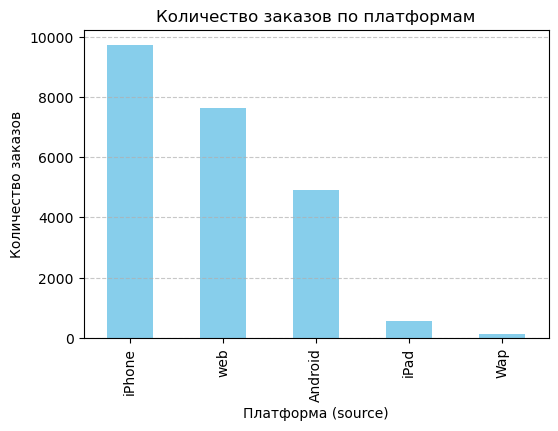

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаю файл 
taxi = pd.read_csv(
    "3_taxi_peru.csv",
    sep=';',  # разделитель
    parse_dates=['start_at', 'end_at', 'arrived_at']  # читаем даты
    )

# Считаю количество заказов по каждой платформе (source)
orders_by_source = taxi['source'].value_counts()

# Строю барчарт
orders_by_source.plot(kind='bar', color='skyblue', figsize=(6,4))

# Добавляю подписи
plt.title('Количество заказов по платформам')
plt.xlabel('Платформа (source)')
plt.ylabel('Количество заказов')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Альтернативный вариант построения распределения категориальной переменной – sns.countplot. 

В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.
sns.countplot(taxi['source'])
Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всег.


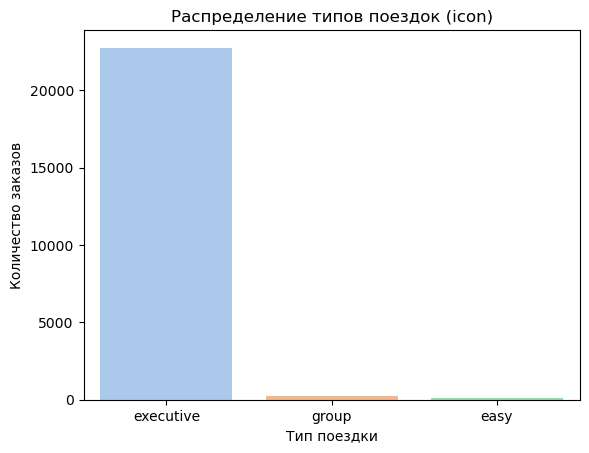

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строю график распределения по типу поездки (icon)
sns.countplot(x=taxi['icon'], palette='pastel')

# Добавил подписи и заголовок
plt.title('Распределение типов поездок (icon)')
plt.xlabel('Тип поездки')
plt.ylabel('Количество заказов')

plt.show()

#### Теперь попробуем построить более сложный график!

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).
Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.


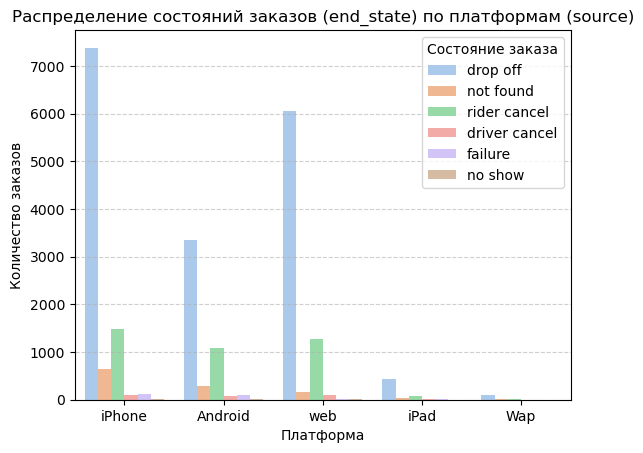

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строю распределение в разрезе платформ (source)
sns.countplot(
    x='source',          # ось X — платформа
    hue='end_state',     # цвет — состояние заказа
    data=taxi,           # данные
    palette='pastel'     # приятная цветовая палитра
)

# Добавил подписи
plt.title('Распределение состояний заказов (end_state) по платформам (source)')
plt.xlabel('Платформа')
plt.ylabel('Количество заказов')
plt.legend(title='Состояние заказа', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

#### Проверим, как распределены оценки водителей (driver_score).


In [5]:
driver_score_counts = (
    taxi['driver_score']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'proportion': 'percentage'})
    .sort_values(by='driver_score')
)

driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


#### Теперь строим график! 

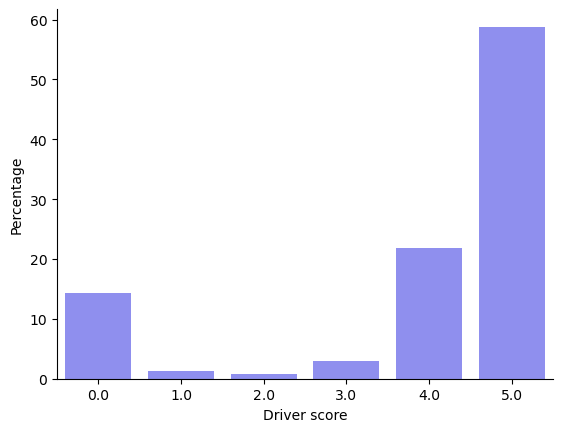

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()
plt.show()

#### 💀 Сложное задание! 💀

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.

В чем его отличие от распределения оценок водителей?

In [12]:
rider_score_counts = (
    taxi['rider_score']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)
rider_score_counts.columns = ['rider_score', 'percentage']  # <-- вручную переименовываем
rider_score_counts = rider_score_counts.sort_values(by='rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


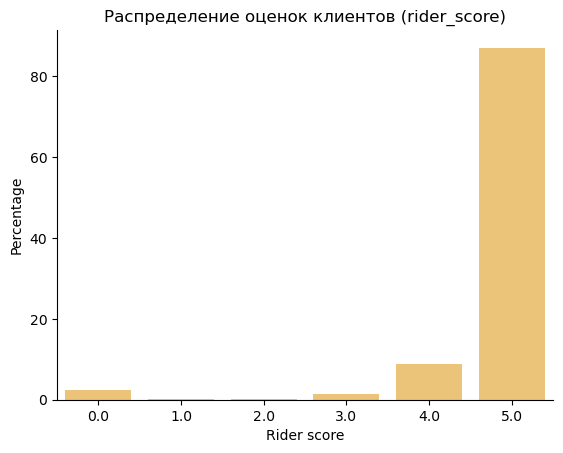

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(
    x='rider_score',
    y='percentage',
    data=rider_score_counts,
    color='orange',
    alpha=0.6
)

ax.set(xlabel='Rider score', ylabel='Percentage', title='Распределение оценок клиентов (rider_score)')
sns.despine()
plt.show()